# Q1

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from utilities import core 

In [2]:
from amalearn.reward import *
from amalearn.environment import *
from amalearn.agent import *

In [3]:
# --------------
# Debugging Cell
# --------------

# build a fake agent for testing and set some initial conditions
np.random.seed(1)
rewards = [ConstantReward(1) for _ in range(4)]
env = MutliArmedBanditEnvironment(rewards, len(rewards), '1')
greedy_agent = EpsilonGreedyAgent('1', env, 0, False, 0, [0, 0, 0.5, 0])
greedy_agent.arm_count = [0, 1, 0, 0]

obs, r, d, info = greedy_agent.take_action()

assert (greedy_agent.q_values == np.array([0, 0, 1, 0])).all()
assert (greedy_agent.arm_count == np.array([0, 1, 1, 0])).all()

greedy_agent.q_values = np.array([0.49, 0.3, 0.5, 0.499])
obs, r, d, info = greedy_agent.take_action()

assert (greedy_agent.q_values == np.array([0.49, 0.3, 0.75, 0.499])).all()
assert (greedy_agent.arm_count == np.array([0, 1, 2, 0])).all()

In [4]:
# --------------
# Debugging Cell
# --------------

# build a fake agent for testing and set some initial conditions
np.random.seed(1)
rewards = [ConstantReward(1) for _ in range(4)]
env = MutliArmedBanditEnvironment(rewards, len(rewards), '1')
gradient_agent = EpsilonGradientAgent('1', env, 0)
gradient_agent.h_values = np.array([1, 1, 1, 1])


obs, r, d, info = gradient_agent.take_action()

assert (gradient_agent.p_values == np.array([0.25, 0.25, 0.25, 0.25])).all()
assert (gradient_agent.h_values == np.array([1, 1, 1, 1])).all()

gradient_agent.h_values = np.array([1, 0.2, 0.8, 0.4])
gradient_agent.arm_count = np.array([0, 0, 0, 0])

obs, r, d, info = gradient_agent.take_action()

assert np.argmax(gradient_agent.p_values) == 0
assert (gradient_agent.arm_count == np.array([1, 0, 0, 0])).all()

## 1)

In [5]:
a = 7
b = a - 2
c = b - 1
d = 6

means = [a, b, c]
stds = [1, 2, 1]
arms_rewards = [GaussianReward(mean, std) for mean, std in zip(means, stds)]
arms_rewards.append(GaussianUnifromReward(d, 2, -d, 1, 0.7, 0.3))

In [6]:


num_runs = 200              
num_steps = 1000

In [7]:
def Run(agent, agent_name, env, optimal_action, num_runs, num_steps, axis):
    rewards = np.zeros((num_runs, num_steps + 1))
    optimal_action_count = np.zeros((num_runs, num_steps + 1))

    for run in range(num_runs):
        np.random.seed(run)
        env.reset()
        agent.reset()

        for i in range(1, num_steps + 1):
            obs, r, d, info = agent.take_action()
            rewards[run, i] = r
            selected_action = info["action"]
            optimal_action_count[run, i] = optimal_action_count[run, max(i - 1, 0)]
            if selected_action == optimal_action:
                optimal_action_count[run, i] += 1 

    avg_reward = np.mean(rewards, axis=0)
    optimal_action = np.mean(optimal_action_count, axis=0) / num_steps 

    core.plot_average_reward(axis[0], avg_reward, agent_name)
    core.plot_optimal_action_percentage(axis[1], optimal_action, agent_name)

    return avg_reward, optimal_action 

In [8]:
def CompareUtil(agent_util, agent_name, env, optimal_action, num_runs, num_steps, axis, alpha, beta, gamma):
    util_agent_name = f"{agent_name} Utility alpha:{alpha} beta:{beta} gamma:{gamma}"
    util_avg_reward, util_optimal_action = Run(
        agent=agent_util, agent_name=util_agent_name,
        env=env, optimal_action=optimal_action, num_runs=num_runs, num_steps=num_steps, axis=axs)
    
    axs[0].legend([agent_name, util_agent_name])
    axs[1].legend([agent_name, util_agent_name])

In [9]:
# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
# env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

# agent_name = "Greedy"
# Run(agent=EpsilonGreedyAgent('1', env, epsilon=0.2, constant_stepsize=False, stepsize=0.1), agent_name=agent_name, 
#                             env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)
# alpha, beta, gamma = 0.5, 0.5, 0.5
# CompareUtil(
#     agent_util=EpsilonGreedyAgent('1', env, epsilon=0.2, constant_stepsize=False, stepsize=0.1, q_initial_values=None, utility=core.utility, alpha=alpha, beta=beta, gamma=gamma),
#     agent_name=agent_name, env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs, alpha=alpha, beta=beta, gamma=gamma)

# axs[1].plot(np.ones(num_steps))
# plt.show()


In [10]:
# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
# env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

# agent_name = "Gradient"
# Run(agent=EpsilonGradientAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1), agent_name=agent_name, 
#                             env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)
# alpha, beta, gamma = 0.5, 0.5, 0.5
# CompareUtil(
#     agent_util=EpsilonGradientAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1, utility=core.utility, alpha=alpha, beta=beta, gamma=gamma),
#     agent_name=agent_name, env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs, alpha=alpha, beta=beta, gamma=gamma)

# axs[1].plot(np.ones(num_steps))
# plt.show()


In [11]:
# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
# env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

# agent_name = "UCB1"
# Run(agent=EpsilonUCBAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1, c=np.sqrt(2)), agent_name=agent_name, 
#                             env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)
# alpha, beta, gamma = 0.5, 0.5, 0.5
# CompareUtil(
#     agent_util=EpsilonUCBAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1, c=np.sqrt(2), q_initial_values=None, utility=core.utility, alpha=alpha, beta=beta, gamma=gamma),
#     agent_name=agent_name, env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs, alpha=alpha, beta=beta, gamma=gamma)

# axs[1].plot(np.ones(num_steps))
# plt.show()


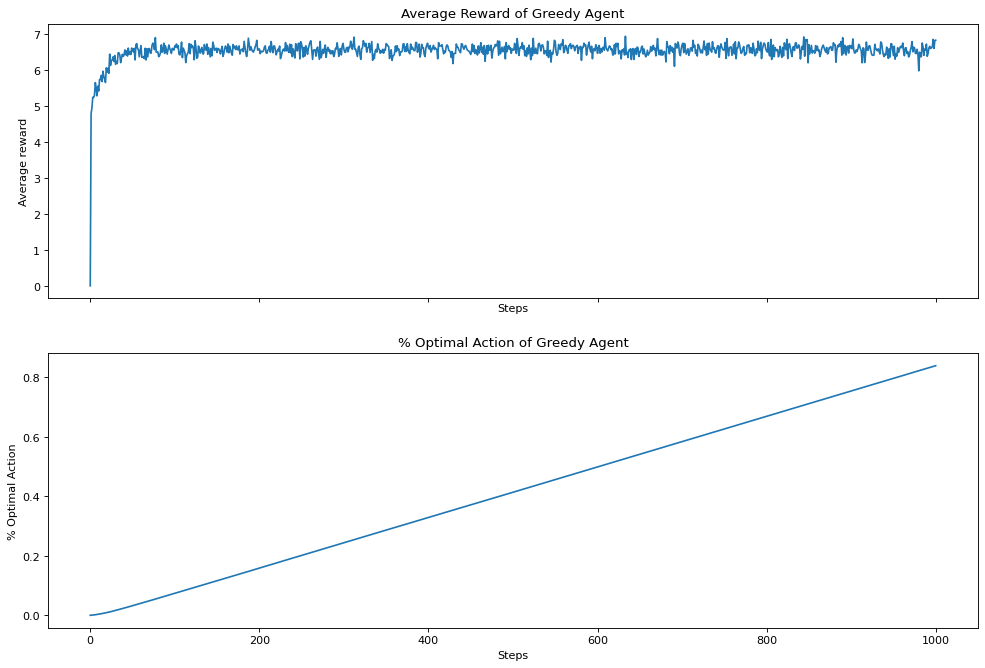

In [12]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

greedy_avg_reward, greedy_optimal_action = Run(agent=EpsilonGreedyAgent('1', env, epsilon=0.2, constant_stepsize=False), agent_name="Greedy", 
                                                env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)

plt.show()

In [13]:
# alpha = 0.5
# beta = 0.5
# gamma = 0.5
# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
# env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

# greedy_util_avg_reward, greedy_util_optimal_action = Run(
#     agent=EpsilonGreedyAgent('1', env, epsilon=0.2, constant_stepsize=False, stepsize=0.1, q_initial_values=None, utility=core.utility, alpha=alpha, beta=beta, gamma=gamma), 
#     agent_name=f"Greedy Utility alpha:{alpha} beta:{beta} gamma:{gamma}",
#     env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)

# axs[1].plot(np.ones(num_steps))
# plt.show()

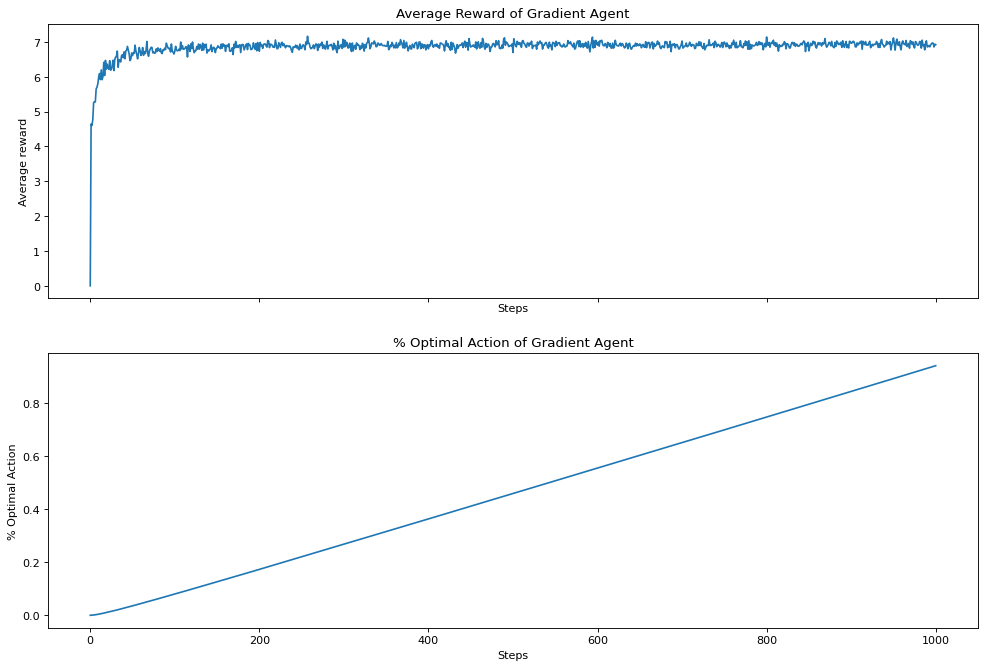

In [14]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

gradient_avg_reward, gradient_optimal_action = Run(agent=EpsilonGradientAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1), agent_name="Gradient", 
                                                env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)

plt.show()

In [15]:
# alpha = 0.5
# beta = 0.5
# gamma = 0.5
# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
# env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

# gradient_util_avg_reward, gradient_util_optimal_action = Run(
#     agent=EpsilonGradientAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1, utility=core.utility, alpha=alpha, beta=beta, gamma=gamma), 
#     agent_name=f"Gradient Utility alpha:{alpha} beta:{beta} gamma:{gamma}",
#     env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)

# axs[1].plot(np.ones(num_steps))
# plt.show()

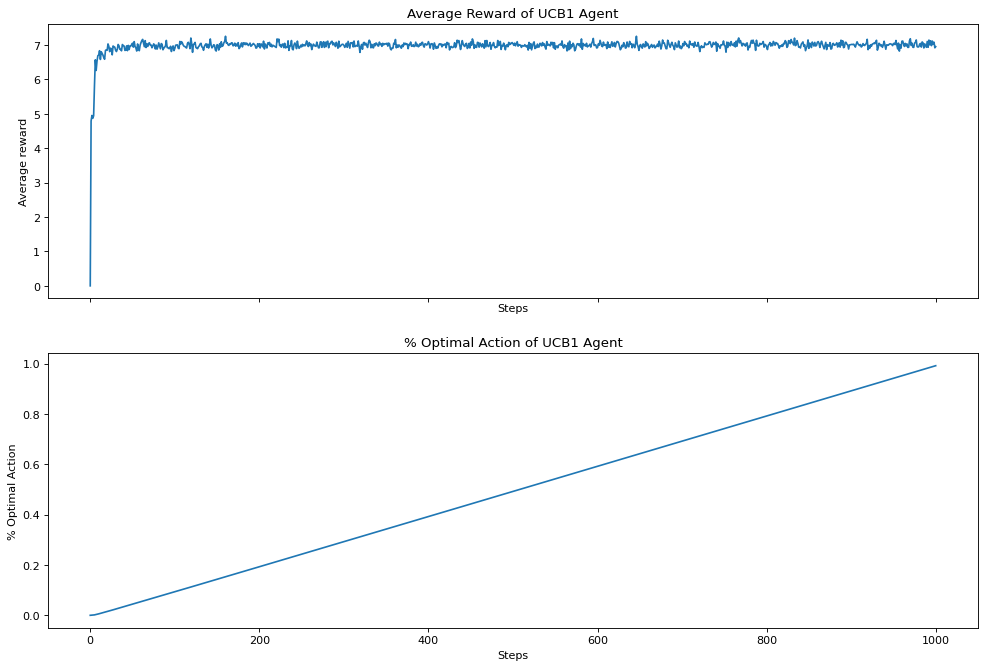

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

ucb1_avg_reward, ucb1_optimal_action = Run(agent=EpsilonUCBAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1, c=np.sqrt(2)), agent_name="UCB1", 
                                                env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)

plt.show()

In [17]:
# alpha = 0.5
# beta = 0.5
# gamma = 0.5
# fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
# env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

# ucb1_util_avg_reward, ucb1_util_optimal_action = Run(
#     agent=EpsilonUCBAgent('1', env, epsilon=0, constant_stepsize=False, stepsize=0.1, c=np.sqrt(2), q_initial_values=None, utility=core.utility, alpha=alpha, beta=beta, gamma=gamma), 
#     agent_name=f"UCB1 Utility alpha:{alpha} beta:{beta} gamma:{gamma}",
#     env=env, optimal_action=0, num_runs=num_runs, num_steps=num_steps, axis=axs)

# axs[1].plot(np.ones(num_steps))
# plt.show()

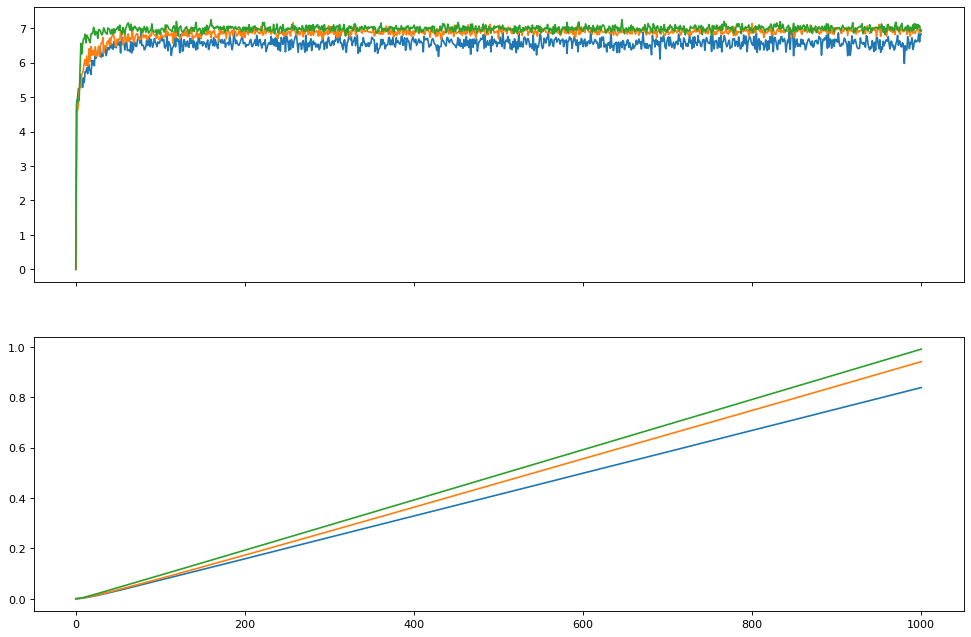

In [18]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
axs[0].plot(greedy_avg_reward)
axs[0].plot(gradient_avg_reward)
axs[0].plot(ucb1_avg_reward)
axs[1].plot(greedy_optimal_action)
axs[1].plot(gradient_optimal_action)
axs[1].plot(ucb1_optimal_action)

### a)

### b)

In [19]:
a = 1.5
b = 1
c = 0.75
d = 6

means = [a, b, c]
stds = [1, 1, 1]
arms_rewards = [GaussianReward(mean, std) for mean, std in zip(means, stds)]
# arms_rewards.append(GaussianUnifromReward(d, 2, -d, 1, 0.7, 0.3))

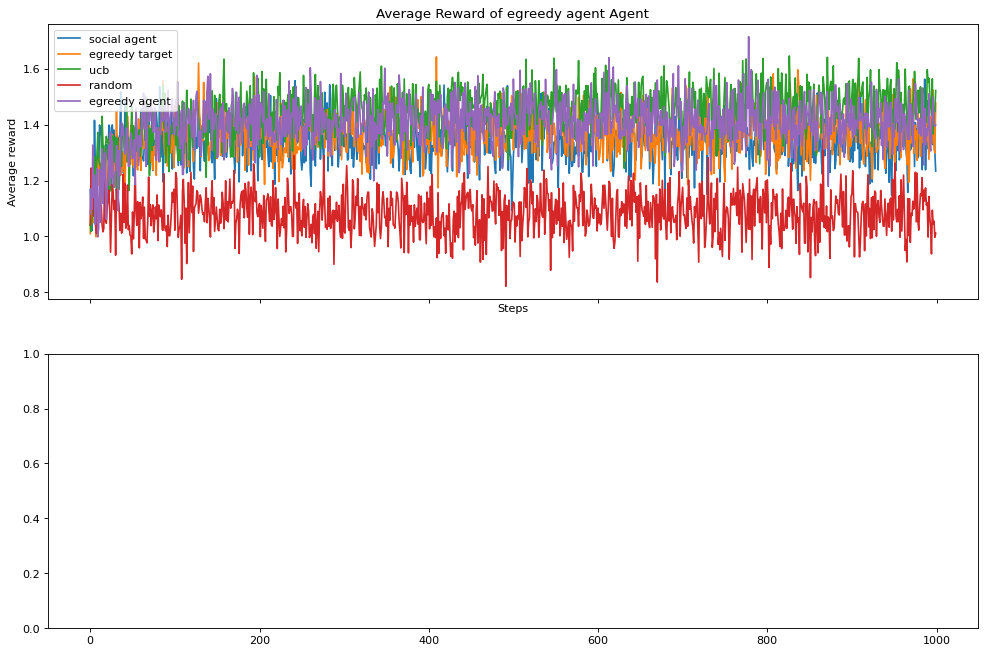

In [20]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

rewards = [np.zeros((num_runs, num_steps)) for i in range(5)]
optimal_action_count = [np.zeros((num_runs, num_steps)) for i in range(4)]
agent = EpsilonGreedyAgent('1', env, 0.2, False, 0)
learner = SocialAgent('1', env, False, 0, 2, 3, np.array([0, 0, 0, 0]))
targets = {"egreedy": EpsilonGreedyAgent('1', env, 0.3, False),
           "ucb": EpsilonUCBAgent('1', env, 0, False, c=2),
           "random": RandomBanditAgent('1', env)}

# targets = [(EpsilonGreedyAgent('1', env, 0.3, False), "egreedy"),
#            (EpsilonUCB1Agent('1', env, 0, False), "ucb"),
#            (RandomBanditAgent('1', env), "random")]
           
for run in range(num_runs):
    np.random.seed(run)
    env.reset()
    agent.reset()
    learner.reset()
    targets["egreedy"].reset()
    targets["ucb"].reset()
    targets["random"].reset()


    for i in range(num_steps):
        obs, r_agent, d, info_agent = agent.take_action()
        obs, r_egreedy, d, info_egreedy = targets["egreedy"].take_action()
        obs, r_ucb, d, info_ucb = targets["ucb"].take_action()
        obs, r_random, d, info_random = targets["random"].take_action()

        rewards[4][run, i] = r_agent 
        rewards[1][run, i] = r_egreedy
        rewards[2][run, i] = r_ucb
        rewards[3][run, i] = r_random

        selected_actions = np.zeros(3)
        selected_actions[0] = info_egreedy["action"] 
        selected_actions[1] = info_ucb["action"] 
        selected_actions[2] = info_random["action"]
        learner.targets_selected_actions = selected_actions
        

        obs, r_learner, d, info_learner = learner.take_action()
        rewards[0][run, i] = r_learner 
        # selected_action = info["action"]
        # optimal_action_count[run, i] = optimal_action_count[run, max(i - 1, 0)]
        # if selected_action == optimal_action:
        #     optimal_action_count[run, i] += 1 

avg_rewards = [np.mean(rewards[i], axis=0) for i in range(5)]
# optimal_action = np.mean(optimal_action_count, axis=0) / num_steps 

core.plot_average_reward(axs[0], avg_rewards[0], "social agent")
core.plot_average_reward(axs[0], avg_rewards[1], "egreedy target")
core.plot_average_reward(axs[0], avg_rewards[2], "ucb")
core.plot_average_reward(axs[0], avg_rewards[3], "random")
core.plot_average_reward(axs[0], avg_rewards[4], "egreedy agent")
axs[0].legend(["social agent", "egreedy target", "ucb", "random", "egreedy agent"])
# core.plot_optimal_action_percentage(axis[1], optimal_action, agent_name)


(array([  5.,   5.,  12.,  47., 166., 360., 280., 106.,  18.,   1.]),
 array([0.99798775, 1.06978192, 1.14157608, 1.21337025, 1.28516441,
        1.35695857, 1.42875274, 1.5005469 , 1.57234106, 1.64413523,
        1.71592939]),
 <BarContainer object of 10 artists>)

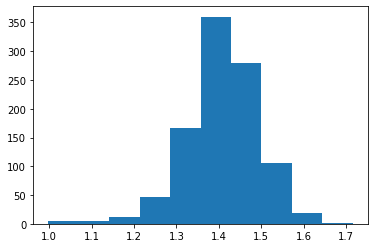

In [21]:
plt.hist(avg_rewards[4])


(array([  2.,   1.,  12.,  70., 164., 252., 275., 158.,  54.,  12.]),
 array([1.02062729, 1.07495379, 1.12928029, 1.18360679, 1.23793329,
        1.29225979, 1.34658629, 1.40091279, 1.45523929, 1.50956579,
        1.56389229]),
 <BarContainer object of 10 artists>)

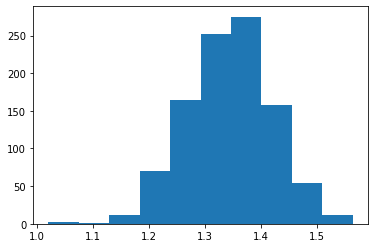

In [22]:
plt.hist(avg_rewards[0])


In [23]:
stats.ttest_ind(a=avg_rewards[0], b=avg_rewards[4], equal_var=True)

Ttest_indResult(statistic=-17.56255131255146, pvalue=2.524306233456753e-64)

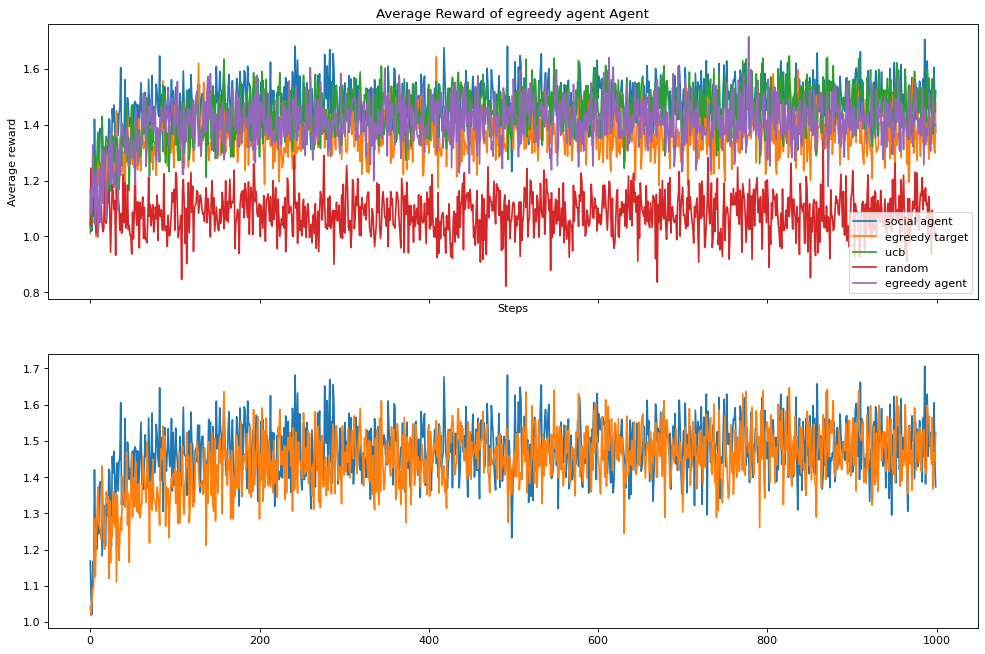

In [24]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

rewards = [np.zeros((num_runs, num_steps)) for i in range(5)]
optimal_action_count = [np.zeros((num_runs, num_steps)) for i in range(4)]
agent = EpsilonGreedyAgent('1', env, 0.2, False, 0)
learner = SocialAgent('1', env, False, 0, 2, 3, np.array([0, 0, 0, 1]))
targets = {"egreedy": EpsilonGreedyAgent('1', env, 0.3, False),
           "ucb": EpsilonUCBAgent('1', env, 0, False, c=2),
           "random": RandomBanditAgent('1', env)}

# targets = [(EpsilonGreedyAgent('1', env, 0.3, False), "egreedy"),
#            (EpsilonUCB1Agent('1', env, 0, False), "ucb"),
#            (RandomBanditAgent('1', env), "random")]
           
for run in range(num_runs):
    np.random.seed(run)
    env.reset()
    agent.reset()
    learner.reset()
    targets["egreedy"].reset()
    targets["ucb"].reset()
    targets["random"].reset()


    for i in range(num_steps):
        obs, r_agent, d, info_agent = agent.take_action()
        obs, r_egreedy, d, info_egreedy = targets["egreedy"].take_action()
        obs, r_ucb, d, info_ucb = targets["ucb"].take_action()
        obs, r_random, d, info_random = targets["random"].take_action()

        rewards[4][run, i] = r_agent 
        rewards[1][run, i] = r_egreedy
        rewards[2][run, i] = r_ucb
        rewards[3][run, i] = r_random

        selected_actions = np.zeros(3)
        selected_actions[0] = info_egreedy["action"] 
        selected_actions[1] = info_ucb["action"] 
        selected_actions[2] = info_random["action"]
        learner.targets_selected_actions = selected_actions
        

        obs, r_learner, d, info_learner = learner.take_action()
        rewards[0][run, i] = r_learner 
        # selected_action = info["action"]
        # optimal_action_count[run, i] = optimal_action_count[run, max(i - 1, 0)]
        # if selected_action == optimal_action:
        #     optimal_action_count[run, i] += 1 

avg_rewards1 = [np.mean(rewards[i], axis=0) for i in range(5)]
# optimal_action = np.mean(optimal_action_count, axis=0) / num_steps 

core.plot_average_reward(axs[0], avg_rewards1[0], "social agent")
core.plot_average_reward(axs[0], avg_rewards1[1], "egreedy target")
core.plot_average_reward(axs[0], avg_rewards1[2], "ucb")
core.plot_average_reward(axs[0], avg_rewards1[3], "random")
core.plot_average_reward(axs[0], avg_rewards1[4], "egreedy agent")
axs[0].legend(["social agent", "egreedy target", "ucb", "random", "egreedy agent"])
# core.plot_optimal_action_percentage(axis[1], optimal_action, agent_name)

# axs[1].plot(avg_rewards[0])
axs[1].plot(avg_rewards1[0])
axs[1].plot(avg_rewards1[2])

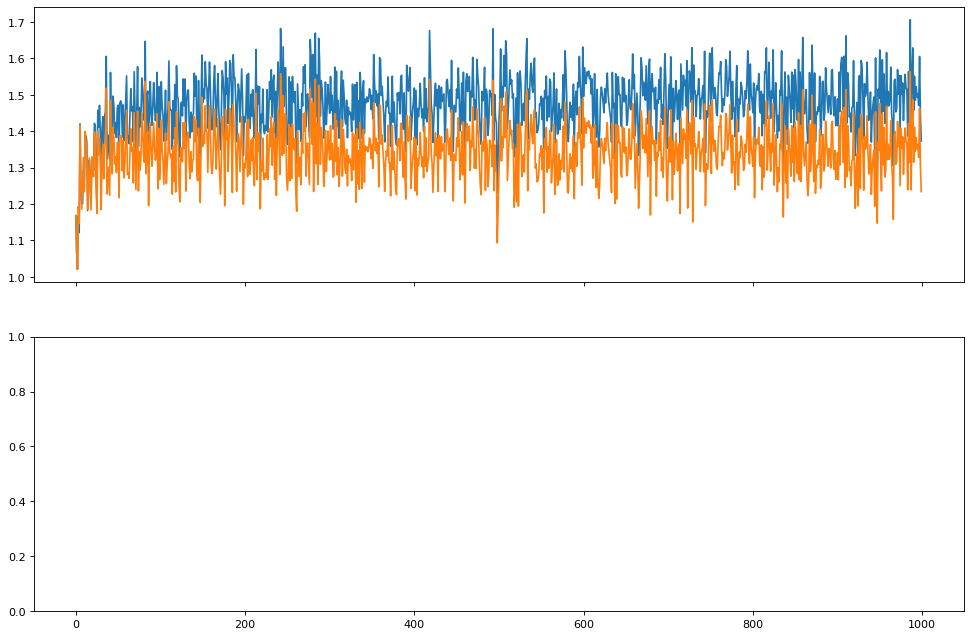

In [25]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

axs[0].plot(avg_rewards1[0])
axs[0].plot(avg_rewards[0])


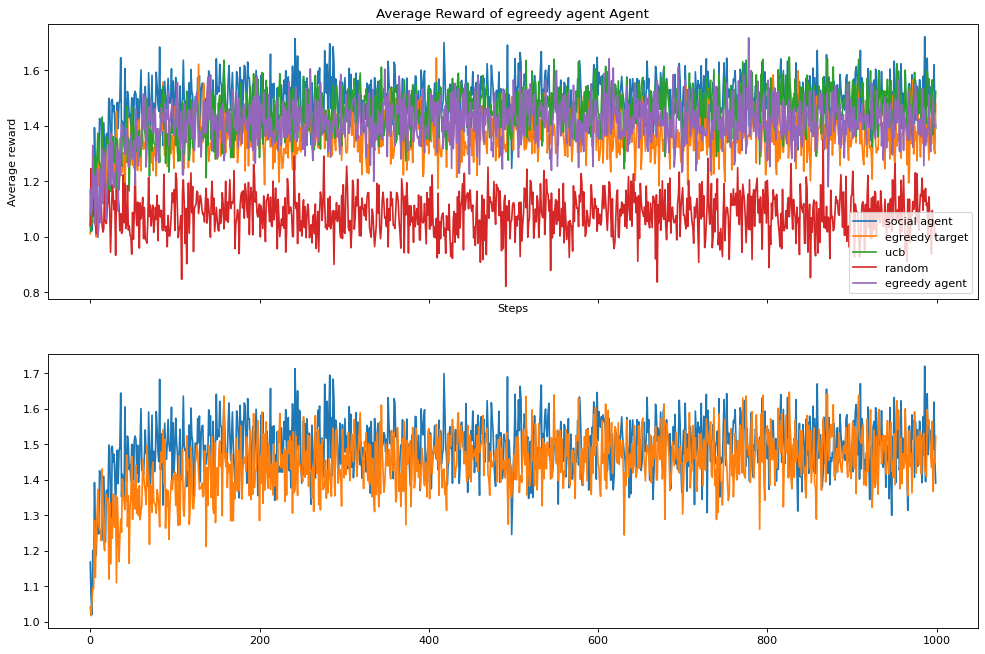

In [33]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
env = MutliArmedBanditEnvironment(arms_rewards, num_steps, '1')

rewards = [np.zeros((num_runs, num_steps)) for i in range(5)]
optimal_action_count = [np.zeros((num_runs, num_steps)) for i in range(4)]
agent = EpsilonGreedyAgent('1', env, 0.2, False, 0)
learner = SocialAgent('1', env, False, 0, 2, 3, np.array([0.25, 0.25, 0.4, 0.1])) # 0.25, 0.25, 0.25, 0.25
targets = {"egreedy": EpsilonGreedyAgent('1', env, 0.3, False),
           "ucb": EpsilonUCBAgent('1', env, 0, False, c=2),
           "random": RandomBanditAgent('1', env)}

# targets = [(EpsilonGreedyAgent('1', env, 0.3, False), "egreedy"),
#            (EpsilonUCB1Agent('1', env, 0, False), "ucb"),
#            (RandomBanditAgent('1', env), "random")]
           
for run in range(num_runs):
    np.random.seed(run)
    env.reset()
    agent.reset()
    learner.reset()
    targets["egreedy"].reset()
    targets["ucb"].reset()
    targets["random"].reset()


    for i in range(num_steps):
        obs, r_agent, d, info_agent = agent.take_action()
        obs, r_egreedy, d, info_egreedy = targets["egreedy"].take_action()
        obs, r_ucb, d, info_ucb = targets["ucb"].take_action()
        obs, r_random, d, info_random = targets["random"].take_action()

        rewards[4][run, i] = r_agent 
        rewards[1][run, i] = r_egreedy
        rewards[2][run, i] = r_ucb
        rewards[3][run, i] = r_random

        selected_actions = np.zeros(3)
        selected_actions[0] = info_egreedy["action"] 
        selected_actions[1] = info_ucb["action"] 
        selected_actions[2] = info_random["action"]
        learner.targets_selected_actions = selected_actions
        

        obs, r_learner, d, info_learner = learner.take_action()
        rewards[0][run, i] = r_learner 
        # selected_action = info["action"]
        # optimal_action_count[run, i] = optimal_action_count[run, max(i - 1, 0)]
        # if selected_action == optimal_action:
        #     optimal_action_count[run, i] += 1 

avg_rewards2 = [np.mean(rewards[i], axis=0) for i in range(5)]
# optimal_action = np.mean(optimal_action_count, axis=0) / num_steps 

core.plot_average_reward(axs[0], avg_rewards2[0], "social agent")
core.plot_average_reward(axs[0], avg_rewards2[1], "egreedy target")
core.plot_average_reward(axs[0], avg_rewards2[2], "ucb")
core.plot_average_reward(axs[0], avg_rewards2[3], "random")
core.plot_average_reward(axs[0], avg_rewards2[4], "egreedy agent")
axs[0].legend(["social agent", "egreedy target", "ucb", "random", "egreedy agent"])
# core.plot_optimal_action_percentage(axis[1], optimal_action, agent_name)

# axs[1].plot(avg_rewards[0])
axs[1].plot(avg_rewards2[0])
axs[1].plot(avg_rewards2[2])

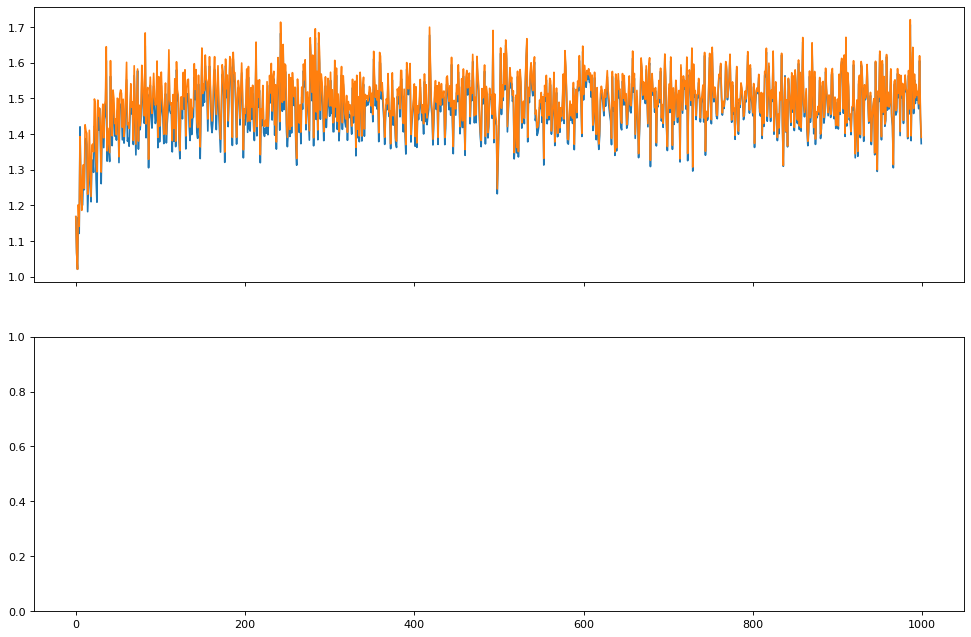

In [34]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')

# axs[0].plot(avg_rewards[0])
axs[0].plot(avg_rewards1[0])
axs[0].plot(avg_rewards2[0])